In [1]:
import sys; sys.path.append("..")
from importlib import reload
import utils.main_experiments as tbr; reload(tbr)
import utils.evaluate as eval_utils; reload(eval_utils)
import data.online_dataset as dld; reload(dld)
import numpy as np
import pandas as pd
import scipy.stats

import matplotlib.pyplot as plt
%matplotlib inline


DATASETS = ['GEFCom-R'] #+ [ 'COVID', 'MIMIC', 'claim', 'GEFCom-R', 'EEG']
NSEEDS = 2
KEEP_TAIL_T = 20 # or None

MAX_Ts = {dataset: dld.get_horizon(dataset) for dataset in DATASETS}
N_TAILS = {dataset: int(np.ceil(0.1 * dld.get_default_ntest(dataset))) for dataset in DATASETS}
DATASETS_MAP = {_: r"\data{}".format(_).replace("-", "") for _ in DATASETS}
DISPLAY_DATASETS_MAP = {"MIMIC": "MIMIC", "COVID":"COVID", "EEG":"EEG", "GEFCom":"GEFCom", "GEFCom-R": "GEFCom-R", 'claim': "CLAIM"}
METHODS = ['TQA-B', "TQA-E"] + ['CFRNN'] + ['CQRNN', 'LASplit'] + ['QRNN', 'DPRNN']
METHOD_MAP = {m:m for m in METHODS}

NON_CONFORMALS = ['QRNN', 'DPRNN']

In [2]:
from collections import defaultdict
ws, covs, cov_granular = [defaultdict(dict) for _ in range(3)]
for dataset in DATASETS:
    min_t = 0 if KEEP_TAIL_T is None else (MAX_Ts[dataset] - KEEP_TAIL_T)
    assert min_t >= 0
    pred_kwargs={"update_cal": True} if dataset == 'GEFCom' else {}
    
    for method in METHODS:
        ws[dataset][method], covs[dataset][method], cov_granular[dataset][method] = tbr.summ_results(method, dataset, seeds=range(NSEEDS), min_t=min_t, pred_kwargs=pred_kwargs, summ_by_T=True)
        print(dataset, method)

eval test: 100%|███████████████████████████████████████████████████████████████████████| 22/22 [00:01<00:00, 21.75it/s]
..\utils\evaluate.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cov'] = (df['y'] <= df['ub']) & (df['y'] >= df['lb'])
..\utils\evaluate.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['w'] = (df['ub'] - df['lb'])
eval test: 100%|███████████████████████████████████████████████████████████████████████| 22/22 [00:01<00:00, 21.42it/s]
..\utils\evaluate.py:58: SettingWithCopy

GEFCom-R TQA-B


eval test: 100%|███████████████████████████████████████████████████████████████████████| 22/22 [00:02<00:00,  9.44it/s]
..\utils\evaluate.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cov'] = (df['y'] <= df['ub']) & (df['y'] >= df['lb'])
..\utils\evaluate.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['w'] = (df['ub'] - df['lb'])
eval test: 100%|███████████████████████████████████████████████████████████████████████| 22/22 [00:02<00:00,  9.19it/s]
..\utils\evaluate.py:58: SettingWithCopy

GEFCom-R TQA-E


eval test: 100%|███████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 66.41it/s]
..\utils\evaluate.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cov'] = (df['y'] <= df['ub']) & (df['y'] >= df['lb'])
..\utils\evaluate.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['w'] = (df['ub'] - df['lb'])
eval test: 100%|███████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 65.29it/s]
..\utils\evaluate.py:58: SettingWithCopy

GEFCom-R CFRNN


eval test: 100%|███████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 57.42it/s]
..\utils\evaluate.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cov'] = (df['y'] <= df['ub']) & (df['y'] >= df['lb'])
..\utils\evaluate.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['w'] = (df['ub'] - df['lb'])
eval test: 100%|███████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 56.97it/s]
..\utils\evaluate.py:58: SettingWithCopy

GEFCom-R CQRNN


eval test: 100%|███████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 54.22it/s]
..\utils\evaluate.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cov'] = (df['y'] <= df['ub']) & (df['y'] >= df['lb'])
..\utils\evaluate.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['w'] = (df['ub'] - df['lb'])
eval test: 100%|███████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 51.94it/s]
..\utils\evaluate.py:58: SettingWithCopy

GEFCom-R LASplit


eval test: 100%|██████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 334.31it/s]
..\utils\evaluate.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cov'] = (df['y'] <= df['ub']) & (df['y'] >= df['lb'])
..\utils\evaluate.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['w'] = (df['ub'] - df['lb'])
eval test: 100%|██████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 307.14it/s]
..\utils\evaluate.py:58: SettingWithCopy

GEFCom-R QRNN


eval test: 100%|███████████████████████████████████████████████████████████████████████| 22/22 [00:04<00:00,  4.47it/s]
..\utils\evaluate.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cov'] = (df['y'] <= df['ub']) & (df['y'] >= df['lb'])
..\utils\evaluate.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['w'] = (df['ub'] - df['lb'])
eval test: 100%|███████████████████████████████████████████████████████████████████████| 22/22 [00:04<00:00,  4.48it/s]

GEFCom-R DPRNN



..\utils\evaluate.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cov'] = (df['y'] <= df['ub']) & (df['y'] >= df['lb'])
..\utils\evaluate.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['w'] = (df['ub'] - df['lb'])


In [3]:
# The Coverage Table
cov_table = {}
for dataset in DATASETS:
    cov_dataset = pd.DataFrame({m: covs[dataset][m].mean(1) for m in METHODS})
    cov_table[dataset] = cov_dataset.mean(0)
pd.DataFrame(cov_table).T

,TQA-B,TQA-E,CFRNN,CQRNN,LASplit,QRNN,DPRNN
GEFCom-R,0.906071,0.910536,0.897821,0.89875,0.901286,0.850857,0.904429


,TQA-B,TQA-E,CFRNN,CQRNN,LASplit,QRNN,DPRNN
GEFCom-R,0.75,0.821071,0.6675,0.716786,0.692857,0.645,0.708571


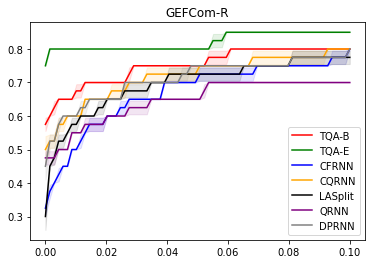

In [4]:
# The UNSCALED TCR Table
tcr_table = {}
for dataset in DATASETS:
    eval_utils.plot_coverage(covs[dataset], perc=10, nx=N_TAILS[dataset], rename_cols=METHOD_MAP, title=DISPLAY_DATASETS_MAP[dataset])
    tcr_dataset = eval_utils.compare_tail_coverage(covs[dataset], tail_n=N_TAILS[dataset], quiet=True)
    tcr_table[dataset] = tcr_dataset.mean(0)
pd.DataFrame(tcr_table).T

In [5]:
# The efficiency table
inveff_table = {}
for dataset in DATASETS:
    effs = eval_utils.compare_efficiency(ws[dataset], covs[dataset])
    inveff_table[dataset] = effs.mean(0)
pd.DataFrame(inveff_table).T

,TQA-B,TQA-E,CFRNN,CQRNN,LASplit,QRNN,DPRNN
GEFCom-R,0.199435,0.220657,0.197942,0.209467,0.205981,0.194886,0.586948
